In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
pip install tensorboard

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(56, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
 
])

In [5]:
model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
tf_callbacks = tf.keras.callbacks.TensorBoard(log_dir = "logs/fit" , histogram_freq = 1)

In [7]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,callbacks=tf_callbacks)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8265 - accuracy: 0.7457 - val_loss: 0.3375 - val_accuracy: 0.9016
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3629 - accuracy: 0.8931 - val_loss: 0.2452 - val_accuracy: 0.9296
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2835 - accuracy: 0.9162 - val_loss: 0.2043 - val_accuracy: 0.9376
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2360 - accuracy: 0.9317 - val_loss: 0.1727 - val_accuracy: 0.9465
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2051 - accuracy: 0.9397 - val_loss: 0.1538 - val_accuracy: 0.9530
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1816 - accuracy: 0.9465 - val_loss: 0.1408 - val_accuracy: 0.9554
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1612 - accuracy: 0.9523 - val_loss: 0.1310 - val_accuracy:

In [8]:
%load_ext tensorboard

In [9]:
tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 2528), started 14 days, 0:45:03 ago. (Use '!kill 2528' to kill it.)

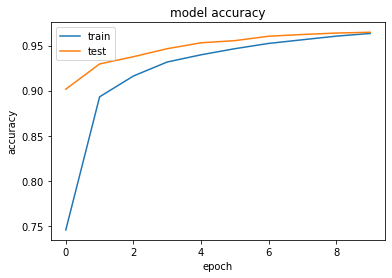

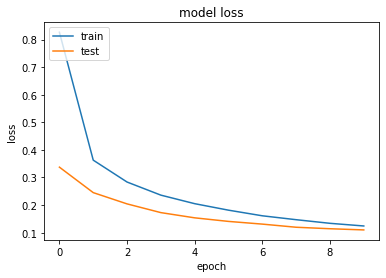

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()